# Test trajectory simulation

This notebook is for testing out parameter settings for the `TrajectoryGenerator` object and seeing what the resulting trajectories look like. It also explains how each of the parameter values affects the sampling procedure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import trajectory

## Parameters

In [2]:
# Seed for random number generator    
RNG_SEED = 999

# Number of steps per trajectory
N_STEPS = 450

# Shape of boundary
BOUNDARY_SHAPE = 'square'

# Height of boundary
BOUNDARY_HEIGHT = 2.0

# Elapsed time per trajectory step
TIME_STEP = 0.1

# Standard deviation of brownian motion used to change direction
STD_NORM = 0.5

# Average speed value (speed is Rayleigh distribution)
MEAN_SPEED = 0.2

# Input coordinates (cartesian or polar)
COORDINATES = 'cartesian'

# Number of trials to run simulation for
N_TRIALS = 100

## Run simulation

In [3]:
# Trajectory parameters are stored in object and used to create TrajectoryGenerator object
params = trajectory.TrajectoryParams(
    rng_seed=RNG_SEED,
    n_steps=N_STEPS,
    boundary_shape=BOUNDARY_SHAPE,
    boundary_height=BOUNDARY_HEIGHT,
    time_step=TIME_STEP,
    std_norm=STD_NORM,
    mean_speed=MEAN_SPEED,
    coordinates=COORDINATES
)
tgen = trajectory.TrajectoryGenerator(params)

# Sampled batch of trajectories is two N_TRIALS * N_STEPS * 2
# arrays: one for velocity and other for position
vel, pos = tgen.smp_batch(N_TRIALS)

## Plot example trials

In [4]:
if params.boundary_shape == 'square':
    boundary = trajectory.SquareBoundary(params.boundary_height)
else:
    raise ValueError('Non-square boundary not supported')

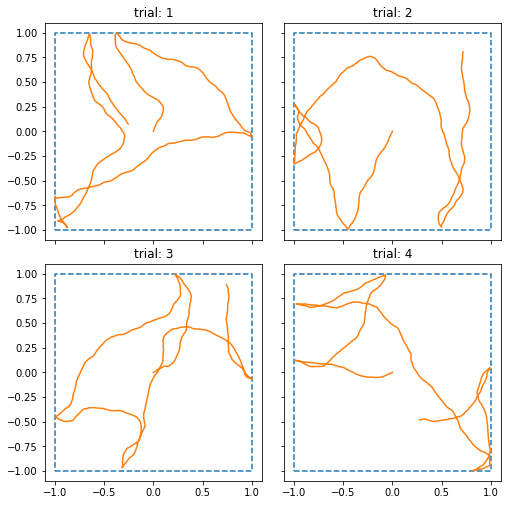

In [5]:
# Trials to plot
trials_plt = [1, 2, 3, 4]

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
axs = ax.flat

# Set aspect ratio of all axes
axs[0].set_aspect('equal', share=True)

# Stick plots close together
fig.tight_layout()

# Plot trials
for i in range(len(trials_plt)):
    trial = trials_plt[i]
    axs[i].set_title(f'trial: {trial}')
    trajectory.plot_position(boundary, pos[trial], axs[i])
